In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
training_data = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

# New section

In [10]:
numeric_columns = training_data.select_dtypes('number').columns

In [11]:
category_columns = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [12]:
ordinal_columns = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [14]:
training_data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [16]:
# IMPUTING THE MISSING VALUES

In [17]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'unemployed_occupation'


In [18]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'unemployed_in_industry'
        

In [19]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
       training_data.loc[i, 'employment_industry'] = 'Not_in_laborforce'


In [20]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
        

In [21]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'other_industry'
        

In [22]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'other_occupation'
        

In [23]:
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


training_data['income_poverty'].fillna(income_poverty_nan, inplace=True)
training_data['marital_status'].fillna(marital_status_nan, inplace=True)
training_data['employment_status'].fillna(employment_status_nan, inplace=True)
training_data['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
training_data['education'].fillna(education_nan, inplace=True)

In [24]:
def missing_count(training_data): # Creating a function which returns the values which is above zero
    
    count_nan = training_data.isnull().sum()
    count_nan = count_nan[count_nan > 0].sort_values()    # To sort down the values
    
    return count_nan

In [25]:
missing_counts_as_nan = missing_count(training_data)

In [26]:
missing_counts_as_nan

behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_adults                 249
household_children               249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
health_insurance               12274
dtype: int64

In [27]:
training_data[category_columns].isna().sum()

race                     0
sex                      0
marital_status           0
rent_or_own              0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [28]:
training_data[ordinal_columns].isna().sum()

age_group            0
education            0
income_poverty       0
employment_status    0
dtype: int64

In [29]:
training_data[numeric_columns].isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [30]:
# GOOD TO GO - Now start encoding the columns

In [31]:
training_data[ordinal_columns]

,age_group,education,income_poverty,employment_status
0,55 - 64 Years,< 12 Years,Below Poverty,Not in Labor Force
1,35 - 44 Years,12 Years,Below Poverty,Employed
2,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
3,65+ Years,12 Years,Below Poverty,Not in Labor Force
4,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Employed
...,...,...,...,...
26702,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force
26703,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
26704,55 - 64 Years,Some College,refused_or_unknown,refused_or_other_category
26705,18 - 34 Years,Some College,"<= $75,000, Above Poverty",Employed


In [32]:
training_data['overall_behaviour_of_respondent'] = training_data['behavioral_antiviral_meds'] + \
training_data['behavioral_avoidance'] + training_data['behavioral_face_mask'] + \
training_data['behavioral_wash_hands'] + training_data['behavioral_large_gatherings'] + \
training_data['behavioral_outside_home'] + training_data['behavioral_touch_face']

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for features in ordinal_columns:
    training_data[features] = le.fit_transform(training_data[features])

In [34]:
training_data = pd.get_dummies(training_data, columns=category_columns, drop_first=True)

In [35]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
final_training_data = pd.merge(training_data, labels, on='respondent_id')

In [38]:
label1 = final_training_data['h1n1_vaccine']
label2 = final_training_data['seasonal_vaccine']

In [39]:
final_training_data.drop('respondent_id', axis=1, inplace=True)

In [40]:
data = final_training_data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)

In [41]:
from sklearn.metrics import classification_report

In [46]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.3/224.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00


In [47]:
import optuna
from optuna import visualization

In [50]:
from optuna.samplers import TPESampler

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, label1, test_size=0.2, random_state=101)

# Define the objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
    }
    
    xgb = XGBClassifier(**param, missing= np.nan, tree_method="gpu_hist")
    #early_stopping_rounds=10,
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label1, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() #scores['test-AUC-mean'].max()
    return AUC

In [52]:
study1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study1.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-17 03:07:20,659] A new study created in memory with name: no-name-3da696e0-e316-42c8-b370-68c1f1b5c8f6
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-17 03:07:25,229] Trial 0 finished with value: 0.8690151864194938 and parameters: {'n_estimators': 316, 'max_depth': 3, 'reg_alpha': 0.7225879702024371, 'reg_lambda': 0.18528140695085546, 'min_child_weight': 5, 'gamma': 0.7350157837124667, 'learning_rate': 0.03586854362379052, 'colsample_bytree': 0.7585793432871033, 'subsample': 0.5279006400592365}. Best is trial 0 with value: 0.8690151864194938.
[I 2023-05-17 03:07:28,713] Trial 1 finished with value: 0.837078323834956 and parameters: {'n_estimators': 197, 'max_depth': 6, 'reg_alpha': 0.17899984544314246, 'reg_lambda': 0.438339376189665, 'min_child_weight': 6, 'gamma': 0.6789799526611687, 'learning_rate': 0.35670832963033294, 'colsample_bytree': 0.5547383160834962, 'subsample': 0.49970963125505113}. Best is trial 0 with value: 0.8690151864194938.
[I 2023-05-17 03:07:32,463] Trial 2 finished with value: 0.8486362257135246 and parameters: {'n_estimators': 91, 'max_depth': 9, 'reg_alpha': 0.21348602573868208, 'reg_lambda': 0.21

In [53]:
study1.best_trial

FrozenTrial(number=101, state=TrialState.COMPLETE, values=[0.8720637379617819], datetime_start=datetime.datetime(2023, 5, 17, 3, 16, 6, 143648), datetime_complete=datetime.datetime(2023, 5, 17, 3, 16, 11, 827135), params={'n_estimators': 249, 'max_depth': 7, 'reg_alpha': 0.5266205396452577, 'reg_lambda': 0.9796610520222887, 'min_child_weight': 6, 'gamma': 0.7378430168803662, 'learning_rate': 0.03629153080933058, 'colsample_bytree': 0.6490131080056952, 'subsample': 0.744702773264524}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning_ra

In [54]:
param_h1n1 = study1.best_params

In [55]:
param_h1n1

{'n_estimators': 249,
 'max_depth': 7,
 'reg_alpha': 0.5266205396452577,
 'reg_lambda': 0.9796610520222887,
 'min_child_weight': 6,
 'gamma': 0.7378430168803662,
 'learning_rate': 0.03629153080933058,
 'colsample_bytree': 0.6490131080056952,
 'subsample': 0.744702773264524}

In [56]:
study1.pruner

In [57]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(data, label1, test_size=0.2, random_state=101)

In [58]:
h1n1_model = XGBClassifier(**param_h1n1,missing= np.nan)

In [59]:
h1n1_model.fit(X_train_h1, y_train_h1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6490131080056952, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7378430168803662, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03629153080933058, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=249, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
h1n1_predict = h1n1_model.predict(X_test_h1)

In [61]:
print(classification_report(y_test_h1, h1n1_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4199
           1       0.74      0.51      0.60      1143

    accuracy                           0.86      5342
   macro avg       0.81      0.73      0.76      5342
weighted avg       0.85      0.86      0.85      5342



In [64]:
from sklearn.metrics import roc_auc_score

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

h1_prediction_roc = h1n1_model.predict_proba(X_test_h1)[:, 1]

roc_auc = roc_auc_score(y_test_h1, h1_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8666316835425341


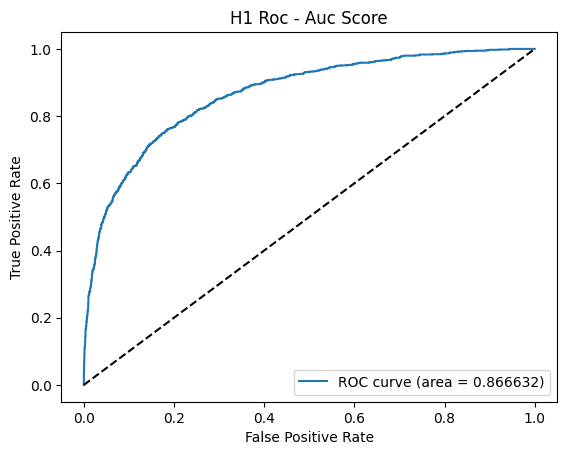

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

h1_prediction_roc = h1n1_model.predict_proba(X_test_h1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_h1, h1_prediction_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('H1 Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

In [83]:
label1.shape

(26707,)

In [84]:
X_train.shape

(21365, 91)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data, label2, test_size=0.2, random_state=101)

# Define the objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
        #'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0, 10)
      #'custom_metric' : ['AUC'],
    }
    
    xgb = XGBClassifier(**param, missing= np.nan, tree_method="gpu_hist")
    #early_stopping_rounds=10,
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label2, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() #scores['test-AUC-mean'].max()
    return AUC

In [89]:
study2 = optuna.create_study(direction='maximize', sampler=TPESampler())
study2.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-17 04:07:55,630] A new study created in memory with name: no-name-9f7e0964-ddb9-4023-b078-0dca5f47e5c9
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-17 04:08:04,949] Trial 0 finished with value: 0.8302967404850381 and parameters: {'n_estimators': 430, 'max_depth': 9, 'reg_alpha': 0.25947053958181127, 'reg_lambda': 0.17762549170371947, 'min_child_weight': 0, 'gamma': 0.9874206350817255, 'learning_rate': 0.17938324843938677, 'colsample_bytree': 0.6367163538144109, 'subsample': 0.3480301751878964}. Best is trial 0 with value: 0.8302967404850381.
[I 2023-05-17 04:08:06,986] Trial 1 finished with value: 0.8241355263344265 and parameters: {'n_estimators': 101, 'max_depth': 4, 'reg_alpha': 0.025993279326083526, 'reg_lambda': 0.8073538168158932, 'min_child_weight': 1, 'gamma': 0.13427087301521126, 'learning_rate': 0.8245544246713644, 'colsample_bytree': 0.5965078814991375, 'subsample': 0.4398749203550743}. Best is trial 0 with value: 0.8302967404850381.
[I 2023-05-17 04:08:16,775] Trial 2 finished with value: 0.6935715189578593 and parameters: {'n_estimators': 263, 'max_depth': 9, 'reg_alpha': 0.9230849890490368, 'reg_lambda': 0

In [90]:
study2.best_trial

FrozenTrial(number=44, state=TrialState.COMPLETE, values=[0.8650290648417265], datetime_start=datetime.datetime(2023, 5, 17, 4, 11, 14, 484494), datetime_complete=datetime.datetime(2023, 5, 17, 4, 11, 19, 538933), params={'n_estimators': 345, 'max_depth': 4, 'reg_alpha': 0.4024786945791097, 'reg_lambda': 0.9463540704057589, 'min_child_weight': 0, 'gamma': 0.5040853545203602, 'learning_rate': 0.048216001785353235, 'colsample_bytree': 0.3510358881732967, 'subsample': 0.33654357454766115}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning

In [91]:
param_seasonal = study2.best_params

In [92]:
param_seasonal

{'n_estimators': 345,
 'max_depth': 4,
 'reg_alpha': 0.4024786945791097,
 'reg_lambda': 0.9463540704057589,
 'min_child_weight': 0,
 'gamma': 0.5040853545203602,
 'learning_rate': 0.048216001785353235,
 'colsample_bytree': 0.3510358881732967,
 'subsample': 0.33654357454766115}

In [93]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(data, label2, test_size=0.2, random_state=101)

In [94]:
seasonal_model = XGBClassifier(**param_seasonal, missing= np.nan)

In [95]:
seasonal_model.fit(X_train_seas, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3510358881732967, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5040853545203602, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.048216001785353235, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=345, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [96]:
seas_predict = seasonal_model.predict(X_test_seas)

In [97]:
print(classification_report(y_test_seas, seas_predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2823
           1       0.79      0.75      0.77      2519

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



In [101]:
seasonal_prediction_roc = seasonal_model.predict_proba(X_test_seas)[:, 1]

roc_auc = roc_auc_score(y_test_seas, seasonal_prediction_roc)

print('ROC - AUC score :' , roc_auc)

ROC - AUC score : 0.8660576360714187


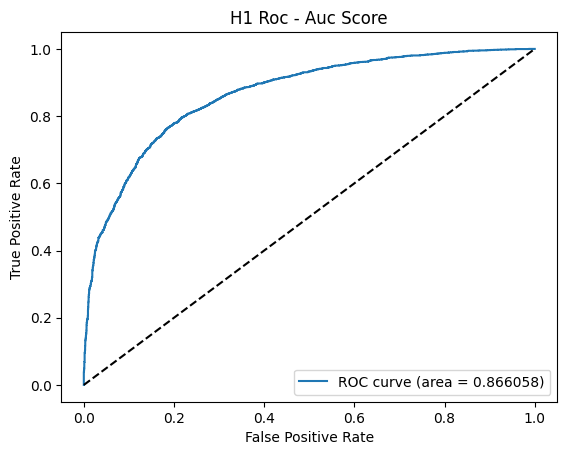

In [105]:
seasonal_prediction_roc = seasonal_model.predict_proba(X_test_seas)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_seas, seasonal_prediction_roc)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seasonal Roc - Auc Score')
plt.legend(loc="lower right")
plt.show()

In [106]:
from joblib import dump

dump(h1n1_model, 'H1N1_joblib_FE_without_dropping.joblib')

['H1N1_joblib_FE_without_dropping.joblib']

In [107]:
dump(seasonal_model, 'Seasonal_joblib_FE_without_dropping.joblib')

['Seasonal_joblib_FE_without_dropping.joblib']